## Seinfeld US.viewers Analysis

### Problem Deifinition
- 미국 드라마 '사인 필드'는 시즌 9, 총 180개의 에피소드로 이루어져 있으며, 회차 별 시청률 확인이 어렵다! 
- 모든 에피소드 중 어떤 시즌의 에피소드가 인기있었는지 or 인기가 없었는지 확인하고 싶다!
- 시즌 별 인기 에피소드를 확인하고 싶다!

### Overall
- 주제 : 사인필드 US.시청률 기반, 시청률 분석 및 인기 에피소드 추출
- 의의 :
  - 총 180개의 에피소드 중 best / worst 에피소드를 바로 확인 가능
  - 애청자에게 사인필드에 대한 Fun Fact 제공

### CONTENTS
- 위키피디아 '사인필드' 시청률 데이터




In [198]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

request = requests.get('https://en.wikipedia.org/wiki/List_of_Seinfeld_episodes')

html = request.text
soup = BeautifulSoup(html, 'html.parser')

In [199]:
seinfeld_season_info = soup.find_all("table", {"class": "wikitable plainrowheaders wikiepisodetable"})

result = []
for i in range(len(seinfeld_season_info)):
  season = i+1
  table = seinfeld_season_info[i]
  no_in_season = [number.get_text() for number in table.select("tbody > tr > td:nth-of-type(1)")]
  title = [title.get_text() for title in table.select("tbody > tr > td:nth-of-type(2)")]
  air_date = [date.get_text() for date in table.select("tbody > tr > td:nth-of-type(5)")]
  US_viewers = [view.get_text().split('[')[0] for view in table.select("tbody > tr > td:nth-of-type(6)")] if i == 0 else [view.get_text().split('[')[0] for view in table.select("tbody > tr > td:nth-of-type(7)")]

  df = pd.DataFrame({ 'season': season, 'no_in_season':no_in_season,'title':title,'air_date':air_date,'US_viewers':US_viewers })
  df['US_viewers'] = df['US_viewers'].astype(float, errors='ignore')
  result.append(df) 

In [200]:
len(result)

9

### 데이터 전처리

1.   row에 2가지 에피소드가 함께 있는 경우, 이를 분리해서 각각의 row로 생성
2.   제목이 같은 연속된 2가지 에피소드는 part(1), part(2)로 나눈다.



In [201]:
result[2].drop(index=[16], inplace=True)

In [202]:
df17 = pd.DataFrame({ 'season': 3, 'no_in_season':"17",'title':"The Boyfriend",'air_date':"February 12, 1992 (1992-02-12)",'US_viewers':"17.0" }, index=[16])
df18 = pd.DataFrame({ 'season': 3, 'no_in_season':"18",'title':"The New Friend",'air_date':"February 12, 1992 (1992-02-12)",'US_viewers':"17.0" }, index=[17])

df17['US_viewers'] = df17['US_viewers'].astype(float, errors='ignore')
df18['US_viewers'] = df18['US_viewers'].astype(float, errors='ignore')

In [203]:
result[2] = pd.concat([result[2].iloc[:16], df17, df18, result[2].iloc[16:]]).reset_index(drop=True)

result[2]

,season,no_in_season,title,air_date,US_viewers
0,3,1,"""The Note""","September 18, 1991 (1991-09-18)",21.7
1,3,2,"""The Truth""","September 25, 1991 (1991-09-25)",16.7
2,3,3,"""The Pen""","October 2, 1991 (1991-10-02)",15.1
3,3,4,"""The Dog""","October 9, 1991 (1991-10-09)",17.2
4,3,5,"""The Library""","October 16, 1991 (1991-10-16)",16.4
5,3,6,"""The Parking Garage""","October 30, 1991 (1991-10-30)",17.0
6,3,7,"""The Café""","November 6, 1991 (1991-11-06)",16.4
7,3,8,"""The Tape""","November 13, 1991 (1991-11-13)",15.8
8,3,9,"""The Nose Job""","November 20, 1991 (1991-11-20)",16.3
9,3,10,"""The Stranded""","November 27, 1991 (1991-11-27)",18.6


In [204]:
result[3].drop(index=[0], inplace=True)

In [205]:
df1 = pd.DataFrame({ 'season': 4, 'no_in_season':"1",'title':"The Trip(1)",'air_date':"August 12, 1992 (1992-08-12)",'US_viewers':"16.3" }, index=[0])
df2 = pd.DataFrame({ 'season': 4, 'no_in_season':"2",'title':"The Trip(2)",'air_date':"August 19, 1992 (1992-08-19)",'US_viewers':"15.1" }, index=[1])

df1['US_viewers'] = df1['US_viewers'].astype(float, errors='ignore')
df2['US_viewers'] = df2['US_viewers'].astype(float, errors='ignore')

In [206]:
result[3] = pd.concat([df1, df2, result[3].iloc[0:]]).reset_index(drop=True)
result[3]

,season,no_in_season,title,air_date,US_viewers
0,4,1,The Trip(1),"August 12, 1992 (1992-08-12)",16.3
1,4,2,The Trip(2),"August 19, 1992 (1992-08-19)",15.1
2,4,34,"""The Pitch""""The Ticket""","September 16, 1992 (1992-09-16)",17.6
3,4,5,"""The Wallet""","September 23, 1992 (1992-09-23)",17.6
4,4,6,"""The Watch""","September 30, 1992 (1992-09-30)",15.2
5,4,7,"""The Bubble Boy""","October 7, 1992 (1992-10-07)",17.1
6,4,8,"""The Cheever Letters""","October 28, 1992 (1992-10-28)",15.1
7,4,9,"""The Opera""","November 4, 1992 (1992-11-04)",16.7
8,4,10,"""The Virgin""","November 11, 1992 (1992-11-11)",16.2
9,4,11,"""The Contest""","November 18, 1992 (1992-11-18)",18.5


In [207]:
result[3].drop(index=[2], inplace=True)

In [208]:
df3 = pd.DataFrame({ 'season': 4, 'no_in_season':"3",'title':"The Pitch",'air_date':"September 16, 1992 (1992-09-16)",'US_viewers':"17.6" }, index=[2])
df4 = pd.DataFrame({ 'season': 4, 'no_in_season':"4",'title':"The Ticket",'air_date':"September 16, 1992 (1992-09-16)",'US_viewers':"17.6" }, index=[3])

df23['US_viewers'] = df23['US_viewers'].astype(float, errors='ignore')
df24['US_viewers'] = df24['US_viewers'].astype(float, errors='ignore')

In [209]:
result[3] = pd.concat([result[3].iloc[:2], df3, df4, result[3].iloc[1:]]).reset_index(drop=True)
result[3]

,season,no_in_season,title,air_date,US_viewers
0,4,1,The Trip(1),"August 12, 1992 (1992-08-12)",16.3
1,4,2,The Trip(2),"August 19, 1992 (1992-08-19)",15.1
2,4,3,The Pitch,"September 16, 1992 (1992-09-16)",17.6
3,4,4,The Ticket,"September 16, 1992 (1992-09-16)",17.6
4,4,2,The Trip(2),"August 19, 1992 (1992-08-19)",15.1
5,4,5,"""The Wallet""","September 23, 1992 (1992-09-23)",17.6
6,4,6,"""The Watch""","September 30, 1992 (1992-09-30)",15.2
7,4,7,"""The Bubble Boy""","October 7, 1992 (1992-10-07)",17.1
8,4,8,"""The Cheever Letters""","October 28, 1992 (1992-10-28)",15.1
9,4,9,"""The Opera""","November 4, 1992 (1992-11-04)",16.7


In [210]:
result[3].drop(index=[23], inplace=True)

In [211]:
df23 = pd.DataFrame({ 'season': 4, 'no_in_season':"23",'title':"The Pilot(1)",'air_date':"May 20, 1993 (1993-05-20)",'US_viewers':"32.8" }, index=[22])
df24 = pd.DataFrame({ 'season': 4, 'no_in_season':"24",'title':"The Pilot(2)",'air_date':"May 20, 1993 (1993-05-20)",'US_viewers':"32.8" }, index=[23])

df23['US_viewers'] = df23['US_viewers'].astype(float, errors='ignore')
df24['US_viewers'] = df24['US_viewers'].astype(float, errors='ignore')

In [212]:
result[3] = result[3].append([df23, df24])
result[3]

,season,no_in_season,title,air_date,US_viewers
0,4,1,The Trip(1),"August 12, 1992 (1992-08-12)",16.3
1,4,2,The Trip(2),"August 19, 1992 (1992-08-19)",15.1
2,4,3,The Pitch,"September 16, 1992 (1992-09-16)",17.6
3,4,4,The Ticket,"September 16, 1992 (1992-09-16)",17.6
4,4,2,The Trip(2),"August 19, 1992 (1992-08-19)",15.1
5,4,5,"""The Wallet""","September 23, 1992 (1992-09-23)",17.6
6,4,6,"""The Watch""","September 30, 1992 (1992-09-30)",15.2
7,4,7,"""The Bubble Boy""","October 7, 1992 (1992-10-07)",17.1
8,4,8,"""The Cheever Letters""","October 28, 1992 (1992-10-28)",15.1
9,4,9,"""The Opera""","November 4, 1992 (1992-11-04)",16.7


In [213]:
result[4].drop(index=[17], inplace=True)

In [214]:
df18 = pd.DataFrame({ 'season': 5, 'no_in_season':"18",'title':"The Raincoats(1)",'air_date':"April 28, 1994 (1994-04-28)",'US_viewers':"29.6" }, index=[17])
df19 = pd.DataFrame({ 'season': 5, 'no_in_season':"19",'title':"The Raincoats(2)",'air_date':"April 28, 1994 (1994-04-28)",'US_viewers':"29.6" }, index=[18])


df18['US_viewers'] = df18['US_viewers'].astype(float, errors='ignore')
df19['US_viewers'] = df19['US_viewers'].astype(float, errors='ignore')

In [215]:
result[4] = pd.concat([result[4].iloc[:17], df18, df19, result[4].iloc[16:]]).reset_index(drop=True)

result[4]

,season,no_in_season,title,air_date,US_viewers
0,5,1,"""The Mango""","September 16, 1993 (1993-09-16)",28.2
1,5,2,"""The Puffy Shirt""","September 23, 1993 (1993-09-23)",29.5
2,5,3,"""The Glasses""","September 30, 1993 (1993-09-30)",28.7
3,5,4,"""The Sniffing Accountant""","October 7, 1993 (1993-10-07)",28.4
4,5,5,"""The Bris""","October 14, 1993 (1993-10-14)",28.7
5,5,6,"""The Lip Reader""","October 28, 1993 (1993-10-28)",31.0
6,5,7,"""The Non-Fat Yogurt""","November 4, 1993 (1993-11-04)",31.1
7,5,8,"""The Barber""","November 11, 1993 (1993-11-11)",29.7
8,5,9,"""The Masseuse""","November 18, 1993 (1993-11-18)",27.7
9,5,10,"""The Cigar Store Indian""","December 9, 1993 (1993-12-09)",29.6


In [216]:
result[5].drop(index=[13], inplace=True)

In [217]:
df14 = pd.DataFrame({ 'season': 6, 'no_in_season':"14",'title':"The Highlights of 100(1)",'air_date':"February 2, 1995 (1995-02-02)",'US_viewers':"34.0" }, index=[13])
df15 = pd.DataFrame({ 'season': 6, 'no_in_season':"15",'title':"The Highlights of 100(2)",'air_date':"February 2, 1995 (1995-02-02)",'US_viewers':"34.0" }, index=[14])

df14['US_viewers'] = df14['US_viewers'].astype(float, errors='ignore')
df15['US_viewers'] = df15['US_viewers'].astype(float, errors='ignore')

In [218]:
result[5] = pd.concat([result[5].iloc[:13], df14, df15, result[5].iloc[13:]]).reset_index(drop=True)

result[5]

,season,no_in_season,title,air_date,US_viewers
0,6,1,"""The Chaperone""","September 22, 1994 (1994-09-22)",32.8
1,6,2,"""The Big Salad""","September 29, 1994 (1994-09-29)",32.4
2,6,3,"""The Pledge Drive""","October 6, 1994 (1994-10-06)",29.8
3,6,4,"""The Chinese Woman""","October 13, 1994 (1994-10-13)",29.2
4,6,5,"""The Couch""","October 27, 1994 (1994-10-27)",28.0
5,6,6,"""The Gymnast""","November 3, 1994 (1994-11-03)",30.6
6,6,7,"""The Soup""","November 10, 1994 (1994-11-10)",29.6
7,6,8,"""The Mom & Pop Store""","November 17, 1994 (1994-11-17)",32.4
8,6,9,"""The Secretary""","December 8, 1994 (1994-12-08)",29.7
9,6,10,"""The Race""","December 15, 1994 (1994-12-15)",26.8


In [219]:
result[6]

,season,no_in_season,title,air_date,US_viewers
0,7,1,"""The Engagement""","September 21, 1995 (1995-09-21)",37.6
1,7,2,"""The Postponement""","September 28, 1995 (1995-09-28)",34.5
2,7,3,"""The Maestro""","October 5, 1995 (1995-10-05)",34.6
3,7,4,"""The Wink""","October 12, 1995 (1995-10-12)",32.3
4,7,5,"""The Hot Tub""","October 19, 1995 (1995-10-19)",32.6
5,7,6,"""The Soup Nazi""","November 2, 1995 (1995-11-02)",33.1
6,7,7,"""The Secret Code""","November 9, 1995 (1995-11-09)",33.9
7,7,8,"""The Pool Guy""","November 16, 1995 (1995-11-16)",33.4
8,7,9,"""The Sponge""","December 7, 1995 (1995-12-07)",32.3
9,7,10,"""The Gum""","December 14, 1995 (1995-12-14)",31.4


In [221]:
result[6].drop(index=[13, 19], inplace=True)

In [222]:
df14 = pd.DataFrame({ 'season': 7, 'no_in_season':"14",'title':"The Cadillac(1)",'air_date':"February 8, 1996 (1996-02-08)",'US_viewers':"35.9" }, index=[13])
df15 = pd.DataFrame({ 'season': 7, 'no_in_season':"15",'title':"The Cadillac(2)",'air_date':"February 8, 1996 (1996-02-08)",'US_viewers':"35.9" }, index=[14])
df21 = pd.DataFrame({ 'season': 7, 'no_in_season':"21",'title':"The Bottle Deposit(1)",'air_date':"May 2, 1996 (1996-05-02)",'US_viewers':"32.4" }, index=[20])
df22 = pd.DataFrame({ 'season': 7, 'no_in_season':"22",'title':"The Bottle Deposit(2)",'air_date':"May 2, 1996 (1996-05-02))",'US_viewers':"32.4" }, index=[21])
  
df14['US_viewers'] = df14['US_viewers'].astype(float, errors='ignore')
df15['US_viewers'] = df15['US_viewers'].astype(float, errors='ignore')
df21['US_viewers'] = df21['US_viewers'].astype(float, errors='ignore')
df22['US_viewers'] = df22['US_viewers'].astype(float, errors='ignore')


In [223]:
result[6] = pd.concat([result[6].iloc[:13], df14, df15, result[6].iloc[13:]]).reset_index(drop=True)
result[6] = pd.concat([result[6].iloc[:20], df21, df22, result[6].iloc[20:]]).reset_index(drop=True)

In [224]:
result[6]

,season,no_in_season,title,air_date,US_viewers
0,7,1,"""The Engagement""","September 21, 1995 (1995-09-21)",37.6
1,7,2,"""The Postponement""","September 28, 1995 (1995-09-28)",34.5
2,7,3,"""The Maestro""","October 5, 1995 (1995-10-05)",34.6
3,7,4,"""The Wink""","October 12, 1995 (1995-10-12)",32.3
4,7,5,"""The Hot Tub""","October 19, 1995 (1995-10-19)",32.6
5,7,6,"""The Soup Nazi""","November 2, 1995 (1995-11-02)",33.1
6,7,7,"""The Secret Code""","November 9, 1995 (1995-11-09)",33.9
7,7,8,"""The Pool Guy""","November 16, 1995 (1995-11-16)",33.4
8,7,9,"""The Sponge""","December 7, 1995 (1995-12-07)",32.3
9,7,10,"""The Gum""","December 14, 1995 (1995-12-14)",31.4


In [225]:
result[8].drop(index=[20, 21], inplace=True)

In [226]:
df21 = pd.DataFrame({ 'season': 9, 'no_in_season':"21",'title':"The Chronicle",'air_date':"May 14, 1998 (1998-05-14)",'US_viewers':"58.53" }, index=[20])
df22 = pd.DataFrame({ 'season': 9, 'no_in_season':"22",'title':"The Clip Show",'air_date':"May 14, 1998 (1998-05-14)",'US_viewers':"58.53" }, index=[21])
df23 = pd.DataFrame({ 'season': 9, 'no_in_season':"23",'title':"The Finale(1)",'air_date':"May 14, 1998 (1998-05-14)",'US_viewers':"76.26" }, index=[22])
df24 = pd.DataFrame({ 'season': 9, 'no_in_season':"24",'title':"The Finale(2)",'air_date':"May 14, 1998 (1998-05-14)",'US_viewers':"76.26" }, index=[23])
  
df21['US_viewers'] = df21['US_viewers'].astype(float, errors='ignore')
df22['US_viewers'] = df22['US_viewers'].astype(float, errors='ignore')
df23['US_viewers'] = df23['US_viewers'].astype(float, errors='ignore')
df24['US_viewers'] = df24['US_viewers'].astype(float, errors='ignore')

In [227]:
result[8] = result[8].append([df21, df22, df23, df24])
result[8]

,season,no_in_season,title,air_date,US_viewers
0,9,1,"""The Butter Shave""","September 25, 1997 (1997-09-25)",37.78
1,9,2,"""The Voice""","October 2, 1997 (1997-10-02)",30.93
2,9,3,"""The Serenity Now""","October 9, 1997 (1997-10-09)",30.15
3,9,4,"""The Blood""","October 16, 1997 (1997-10-16)",31.45
4,9,5,"""The Junk Mail""","October 30, 1997 (1997-10-30)",30.24
5,9,6,"""The Merv Griffin Show""","November 6, 1997 (1997-11-06)",31.64
6,9,7,"""The Slicer""","November 13, 1997 (1997-11-13)",32.77
7,9,8,"""The Betrayal""","November 20, 1997 (1997-11-20)",33.99
8,9,9,"""The Apology""","December 11, 1997 (1997-12-11)",30.47
9,9,10,"""The Strike""","December 18, 1997 (1997-12-18)",30.79


In [228]:
whole_season = pd.concat(result, ignore_index='True')

In [229]:
whole_season[whole_season['US_viewers'] == 'N/A']

,season,no_in_season,title,air_date,US_viewers
79,5,15,"""The Pie""","February 17, 1994 (1994-02-17)",N/A


In [230]:
whole_season.drop(index=79,inplace=True)

In [231]:
# whole_season.iloc[76, whole_season.columns.get_loc('US_viewers')] = 0.0
whole_season[whole_season['US_viewers'] == 'N/A']

,season,no_in_season,title,air_date,US_viewers


In [232]:
whole_season['US_viewers'] = whole_season['US_viewers'].astype(float, errors='ignore')

In [233]:
whole_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 181
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        181 non-null    int64  
 1   no_in_season  181 non-null    object 
 2   title         181 non-null    object 
 3   air_date      181 non-null    object 
 4   US_viewers    181 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.5+ KB


In [234]:
whole_season

,season,no_in_season,title,air_date,US_viewers
0,1,1,"""The Seinfeld Chronicles""","July 5, 1989 (1989-07-05)",15.40
1,1,2,"""The Stake Out""","May 31, 1990 (1990-05-31)",22.50
2,1,3,"""The Robbery""","June 7, 1990 (1990-06-07)",19.70
3,1,4,"""Male Unbonding""","June 14, 1990 (1990-06-14)",19.10
4,1,5,"""The Stock Tip""","June 21, 1990 (1990-06-21)",19.40
...,...,...,...,...,...
177,9,20,"""The Puerto Rican Day""","May 7, 1998 (1998-05-07)",38.78
178,9,21,The Chronicle,"May 14, 1998 (1998-05-14)",58.53
179,9,22,The Clip Show,"May 14, 1998 (1998-05-14)",58.53
180,9,23,The Finale(1),"May 14, 1998 (1998-05-14)",76.26


In [171]:
whole_season[whole_season['season'] == 1]

,season,no_in_season,title,air_date,US_viewers
0,1,1,"""The Seinfeld Chronicles""","July 5, 1989 (1989-07-05)",15.4
1,1,2,"""The Stake Out""","May 31, 1990 (1990-05-31)",22.5
2,1,3,"""The Robbery""","June 7, 1990 (1990-06-07)",19.7
3,1,4,"""Male Unbonding""","June 14, 1990 (1990-06-14)",19.1
4,1,5,"""The Stock Tip""","June 21, 1990 (1990-06-21)",19.4


In [263]:
whole_season[whole_season['season'] == 2]

,season,no_in_season,title,air_date,US_viewers
5,2,1,"""The Ex-Girlfriend""","January 23, 1991 (1991-01-23)",15.6
6,2,2,"""The Pony Remark""","January 30, 1991 (1991-01-30)",15.2
7,2,3,"""The Jacket""","February 6, 1991 (1991-02-06)",14.8
8,2,4,"""The Phone Message""","February 13, 1991 (1991-02-13)",13.6
9,2,5,"""The Apartment""","April 4, 1991 (1991-04-04)",24.7
10,2,6,"""The Statue""","April 11, 1991 (1991-04-11)",23.3
11,2,7,"""The Revenge""","April 18, 1991 (1991-04-18)",19.6
12,2,8,"""The Heart Attack""","April 25, 1991 (1991-04-25)",20.6
13,2,9,"""The Deal""","May 2, 1991 (1991-05-02)",22.9
14,2,10,"""The Baby Shower""","May 16, 1991 (1991-05-16)",17.2


In [264]:
whole_season[whole_season['season'] == 3]

,season,no_in_season,title,air_date,US_viewers
17,3,1,"""The Note""","September 18, 1991 (1991-09-18)",21.7
18,3,2,"""The Truth""","September 25, 1991 (1991-09-25)",16.7
19,3,3,"""The Pen""","October 2, 1991 (1991-10-02)",15.1
20,3,4,"""The Dog""","October 9, 1991 (1991-10-09)",17.2
21,3,5,"""The Library""","October 16, 1991 (1991-10-16)",16.4
22,3,6,"""The Parking Garage""","October 30, 1991 (1991-10-30)",17.0
23,3,7,"""The Café""","November 6, 1991 (1991-11-06)",16.4
24,3,8,"""The Tape""","November 13, 1991 (1991-11-13)",15.8
25,3,9,"""The Nose Job""","November 20, 1991 (1991-11-20)",16.3
26,3,10,"""The Stranded""","November 27, 1991 (1991-11-27)",18.6


In [265]:
whole_season[whole_season['season'] == 4]

,season,no_in_season,title,air_date,US_viewers
40,4,1,The Trip(1),"August 12, 1992 (1992-08-12)",16.3
41,4,2,The Trip(2),"August 19, 1992 (1992-08-19)",15.1
42,4,3,The Pitch,"September 16, 1992 (1992-09-16)",17.6
43,4,4,The Ticket,"September 16, 1992 (1992-09-16)",17.6
44,4,2,The Trip(2),"August 19, 1992 (1992-08-19)",15.1
45,4,5,"""The Wallet""","September 23, 1992 (1992-09-23)",17.6
46,4,6,"""The Watch""","September 30, 1992 (1992-09-30)",15.2
47,4,7,"""The Bubble Boy""","October 7, 1992 (1992-10-07)",17.1
48,4,8,"""The Cheever Letters""","October 28, 1992 (1992-10-28)",15.1
49,4,9,"""The Opera""","November 4, 1992 (1992-11-04)",16.7


In [175]:
whole_season[whole_season['season'] == 5]

,season,no_in_season,title,air_date,US_viewers
65,5,1,"""The Mango""","September 16, 1993 (1993-09-16)",28.2
66,5,2,"""The Puffy Shirt""","September 23, 1993 (1993-09-23)",29.5
67,5,3,"""The Glasses""","September 30, 1993 (1993-09-30)",28.7
68,5,4,"""The Sniffing Accountant""","October 7, 1993 (1993-10-07)",28.4
69,5,5,"""The Bris""","October 14, 1993 (1993-10-14)",28.7
70,5,6,"""The Lip Reader""","October 28, 1993 (1993-10-28)",31.0
71,5,7,"""The Non-Fat Yogurt""","November 4, 1993 (1993-11-04)",31.1
72,5,8,"""The Barber""","November 11, 1993 (1993-11-11)",29.7
73,5,9,"""The Masseuse""","November 18, 1993 (1993-11-18)",27.7
74,5,10,"""The Cigar Store Indian""","December 9, 1993 (1993-12-09)",29.6


In [176]:
whole_season[whole_season['season'] == 6]

,season,no_in_season,title,air_date,US_viewers
88,6,1,"""The Chaperone""","September 22, 1994 (1994-09-22)",32.8
89,6,2,"""The Big Salad""","September 29, 1994 (1994-09-29)",32.4
90,6,3,"""The Pledge Drive""","October 6, 1994 (1994-10-06)",29.8
91,6,4,"""The Chinese Woman""","October 13, 1994 (1994-10-13)",29.2
92,6,5,"""The Couch""","October 27, 1994 (1994-10-27)",28.0
93,6,6,"""The Gymnast""","November 3, 1994 (1994-11-03)",30.6
94,6,7,"""The Soup""","November 10, 1994 (1994-11-10)",29.6
95,6,8,"""The Mom & Pop Store""","November 17, 1994 (1994-11-17)",32.4
96,6,9,"""The Secretary""","December 8, 1994 (1994-12-08)",29.7
97,6,10,"""The Race""","December 15, 1994 (1994-12-15)",26.8


In [177]:
whole_season[whole_season['season'] == 7]

,season,no_in_season,title,air_date,US_viewers
112,7,1,"""The Engagement""","September 21, 1995 (1995-09-21)",37.60
113,7,2,"""The Postponement""","September 28, 1995 (1995-09-28)",34.50
114,7,3,"""The Maestro""","October 5, 1995 (1995-10-05)",34.60
115,7,4,"""The Wink""","October 12, 1995 (1995-10-12)",32.30
116,7,5,"""The Hot Tub""","October 19, 1995 (1995-10-19)",32.60
117,7,6,"""The Soup Nazi""","November 2, 1995 (1995-11-02)",33.10
118,7,7,"""The Secret Code""","November 9, 1995 (1995-11-09)",33.90
119,7,8,"""The Pool Guy""","November 16, 1995 (1995-11-16)",33.40
120,7,9,"""The Sponge""","December 7, 1995 (1995-12-07)",32.30
121,7,10,"""The Gum""","December 14, 1995 (1995-12-14)",31.40


In [178]:
whole_season[whole_season['season'] == 8]

,season,no_in_season,title,air_date,US_viewers
136,8,1,"""The Foundation""","September 19, 1996 (1996-09-19)",33.72
137,8,2,"""The Soul Mate""","September 26, 1996 (1996-09-26)",33.24
138,8,3,"""The Bizarro Jerry""","October 3, 1996 (1996-10-03)",31.62
139,8,4,"""The Little Kicks""","October 10, 1996 (1996-10-10)",32.24
140,8,5,"""The Package""","October 17, 1996 (1996-10-17)",30.13
141,8,6,"""The Fatigues""","October 31, 1996 (1996-10-31)",30.33
142,8,7,"""The Checks""","November 7, 1996 (1996-11-07)",32.01
143,8,8,"""The Chicken Roaster""","November 14, 1996 (1996-11-14)",34.09
144,8,9,"""The Abstinence""","November 21, 1996 (1996-11-21)",34.35
145,8,10,"""The Andrea Doria""","December 19, 1996 (1996-12-19)",29.65


In [179]:
whole_season[whole_season['season'] == 9]

,season,no_in_season,title,air_date,US_viewers
158,9,1,"""The Butter Shave""","September 25, 1997 (1997-09-25)",37.78
159,9,2,"""The Voice""","October 2, 1997 (1997-10-02)",30.93
160,9,3,"""The Serenity Now""","October 9, 1997 (1997-10-09)",30.15
161,9,4,"""The Blood""","October 16, 1997 (1997-10-16)",31.45
162,9,5,"""The Junk Mail""","October 30, 1997 (1997-10-30)",30.24
163,9,6,"""The Merv Griffin Show""","November 6, 1997 (1997-11-06)",31.64
164,9,7,"""The Slicer""","November 13, 1997 (1997-11-13)",32.77
165,9,8,"""The Betrayal""","November 20, 1997 (1997-11-20)",33.99
166,9,9,"""The Apology""","December 11, 1997 (1997-12-11)",30.47
167,9,10,"""The Strike""","December 18, 1997 (1997-12-18)",30.79


시청률 추이

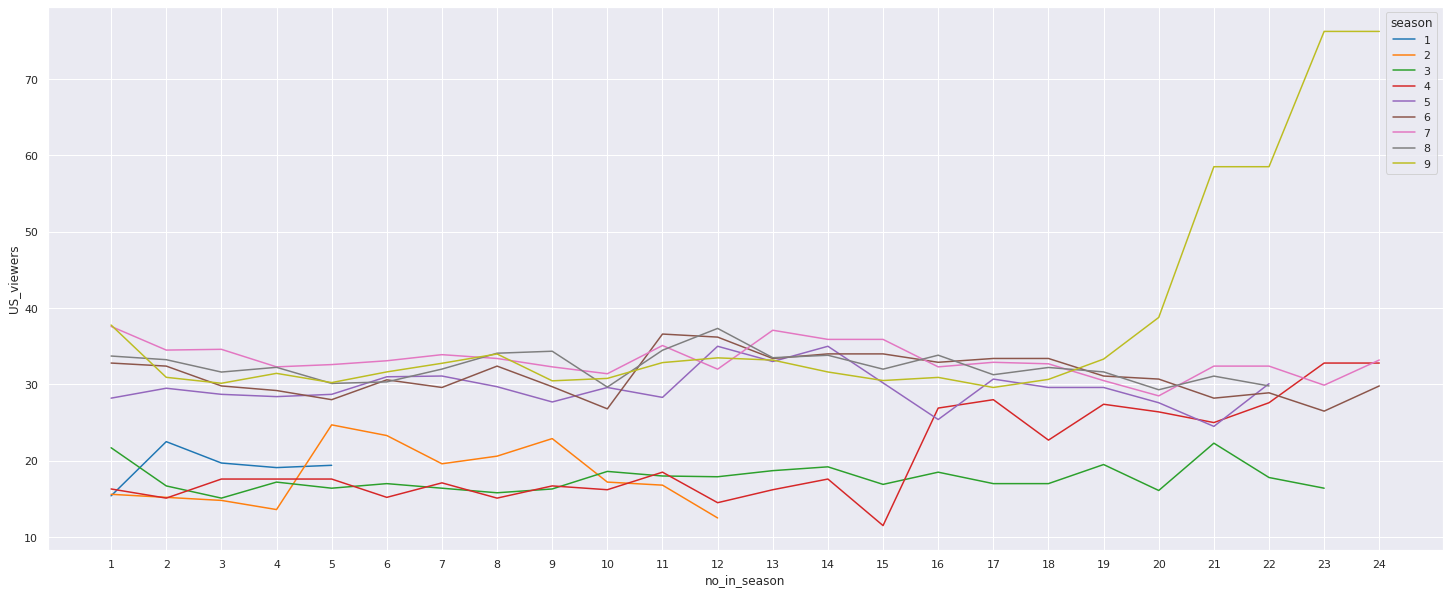

In [235]:
sns.lineplot(x='no_in_season', y='US_viewers', data=whole_season, hue='season',palette='tab10')
sns.set(rc = {'figure.figsize':(39,10)})
# sns.lineplot(data=may_flights, x="year", y="passengers")

회차 별 시청률 변화

In [275]:
index_of_ep = [i for i in range(1, 182)]
whole_season['index'] = index_of_ep
whole_season

,season,no_in_season,title,air_date,US_viewers,index
0,1,1,"""The Seinfeld Chronicles""","July 5, 1989 (1989-07-05)",15.40,1
1,1,2,"""The Stake Out""","May 31, 1990 (1990-05-31)",22.50,2
2,1,3,"""The Robbery""","June 7, 1990 (1990-06-07)",19.70,3
3,1,4,"""Male Unbonding""","June 14, 1990 (1990-06-14)",19.10,4
4,1,5,"""The Stock Tip""","June 21, 1990 (1990-06-21)",19.40,5
...,...,...,...,...,...,...
177,9,20,"""The Puerto Rican Day""","May 7, 1998 (1998-05-07)",38.78,177
178,9,21,The Chronicle,"May 14, 1998 (1998-05-14)",58.53,178
179,9,22,The Clip Show,"May 14, 1998 (1998-05-14)",58.53,179
180,9,23,The Finale(1),"May 14, 1998 (1998-05-14)",76.26,180


시리즈 별 가장 많이 본 에피소드 top10

In [240]:
topEp_in_season = whole_season.sort_values(['season', 'US_viewers'], ascending=False).groupby('season').head(1)
topEp_in_season

,season,no_in_season,title,air_date,US_viewers
180,9,23,The Finale(1),"May 14, 1998 (1998-05-14)",76.26
147,8,12,"""The Money""","January 16, 1997 (1997-01-16)",37.34
112,7,1,"""The Engagement""","September 21, 1995 (1995-09-21)",37.60
98,6,11,"""The Switch""","January 5, 1995 (1995-01-05)",36.60
76,5,12,"""The Stall""","January 6, 1994 (1994-01-06)",35.00
63,4,23,The Pilot(1),"May 20, 1993 (1993-05-20)",32.80
37,3,21,"""The Letter""","March 25, 1992 (1992-03-25)",22.30
9,2,5,"""The Apartment""","April 4, 1991 (1991-04-04)",24.70
1,1,2,"""The Stake Out""","May 31, 1990 (1990-05-31)",22.50


가장 많이 본 에피소드 top10



In [236]:
top10_ep = whole_season.sort_values('US_viewers', ascending=False)
top10_ep[:10]

,season,no_in_season,title,air_date,US_viewers
181,9,24,The Finale(2),"May 14, 1998 (1998-05-14)",76.26
180,9,23,The Finale(1),"May 14, 1998 (1998-05-14)",76.26
179,9,22,The Clip Show,"May 14, 1998 (1998-05-14)",58.53
178,9,21,The Chronicle,"May 14, 1998 (1998-05-14)",58.53
177,9,20,"""The Puerto Rican Day""","May 7, 1998 (1998-05-07)",38.78
158,9,1,"""The Butter Shave""","September 25, 1997 (1997-09-25)",37.78
112,7,1,"""The Engagement""","September 21, 1995 (1995-09-21)",37.60
147,8,12,"""The Money""","January 16, 1997 (1997-01-16)",37.34
124,7,13,"""The Seven""","February 1, 1996 (1996-02-01)",37.10
98,6,11,"""The Switch""","January 5, 1995 (1995-01-05)",36.60


가장 적게 본 에피소드 TOP10

In [241]:
low10_ep = whole_season.sort_values('US_viewers')
low10_ep[:10]

,season,no_in_season,title,air_date,US_viewers
55,4,15,"""The Visa""","January 27, 1993 (1993-01-27)",11.5
16,2,12,"""The Busboy""","June 26, 1991 (1991-06-26)",12.5
8,2,4,"""The Phone Message""","February 13, 1991 (1991-02-13)",13.6
52,4,12,"""The Airport""","November 25, 1992 (1992-11-25)",14.5
7,2,3,"""The Jacket""","February 6, 1991 (1991-02-06)",14.8
41,4,2,The Trip(2),"August 19, 1992 (1992-08-19)",15.1
44,4,2,The Trip(2),"August 19, 1992 (1992-08-19)",15.1
19,3,3,"""The Pen""","October 2, 1991 (1991-10-02)",15.1
48,4,8,"""The Cheever Letters""","October 28, 1992 (1992-10-28)",15.1
6,2,2,"""The Pony Remark""","January 30, 1991 (1991-01-30)",15.2


In [ ]:
top10_ep = whole_season.sort_values('US_viewers')
top10_ep[:10]